In [33]:
import numpy as np
a = np.arange(400,680)
len(np.arange(16,57,4)), (57-16) / 4

(11, 10.25)

# SNOwGLoBES Model Access

Demonstrate access to the `SNOwGLoBES` class in `snewpy` and visually inspect the data.

At the moment the class only reads the NoOsc files inside the tarfiles.

In [1]:
from snewpy.models import SNOwGLoBES

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', size=14)

## Plotting Functions

Two functions are provided:
1. One to plot the spectrum (number flux, actually fluence) at a given time.
1. One to plot the fluence in 2D vs. energy and time.

In [2]:
def plot_spectrum(snmodel, time=0.):
    """Plot spectrum (count/cm2) from SNOwGLoBES model at a given time.
    """
    fig, axes = plt.subplots(2,3, figsize=(14,8), sharex=True, sharey=True,
                             gridspec_kw={'wspace':0, 'hspace':0})

    for ax, (flavor, fl) in zip(axes.flatten(), snmodel.get_fluence(0.).items()): 
        ax.plot(snmodel.energy, fl, label=flavor)
        ax.legend()
        ax.grid(ls=':')

    axes[0,0].set(ylabel='fluence [cm$^{-2}$ (0.2 MeV)$^{-1}$]')
    axes[1,0].set(xlabel='energy [MeV]', xlim=(-0.5,10.5))
    fig.tight_layout()
    return fig

def plot_fluence(snmodel, log=False):
    """Plot the fluence (count/cm2) vs energy and time.
    """
    fig, axes = plt.subplots(2,3, figsize=(14,8), sharex=True, sharey=True,
                             gridspec_kw={'wspace':0, 'hspace':0})

    if log:
        norm = mpl.colors.LogNorm(vmin=1., vmax=snmodel.fmax)
    else:
        norm = mpl.colors.Normalize(vmin=0., vmax=snmodel.fmax)
        
    for ax, (flavor, fl) in zip(axes.flatten(), snmodel.flux.items()): 
        im = ax.imshow(fl, extent=[snmodel.time[0], snmodel.time[-1], snmodel.energy[0], snmodel.energy[-1]],
                       origin='lower', cmap='Blues', norm=norm,
                       aspect='auto')
        ax.text(0.8,0.9, flavor, fontsize=12, transform=ax.transAxes)
        ax.grid(ls=':')

    axes[0,0].set(xlim=(snmodel.time[0], snmodel.time[-1]),
                  ylim=(0,10), ylabel='energy [MeV]')
    axes[1,0].set(xlabel='time [s]')

    fig.tight_layout()
    fig.subplots_adjust(right=0.8)
    cb_ax = fig.add_axes([0.82, 0.1, 0.02, 0.85])
    cb = fig.colorbar(im, cax=cb_ax)
    cb.set_label('fluence [cm$^{-2}$ (0.2 MeV)$^{-1}$]')

## PISN Models

Plot the spectrum at $t=0$ and the total fluence for some of the PISN models.

### 150$M_{\odot}$ Progenitor, Helm EOS

In [3]:
sn1 = SNOwGLoBES('../../models/PISN/PISN_150Msun_EOS=Helm_NeutrinoFlux.tar.bz2')

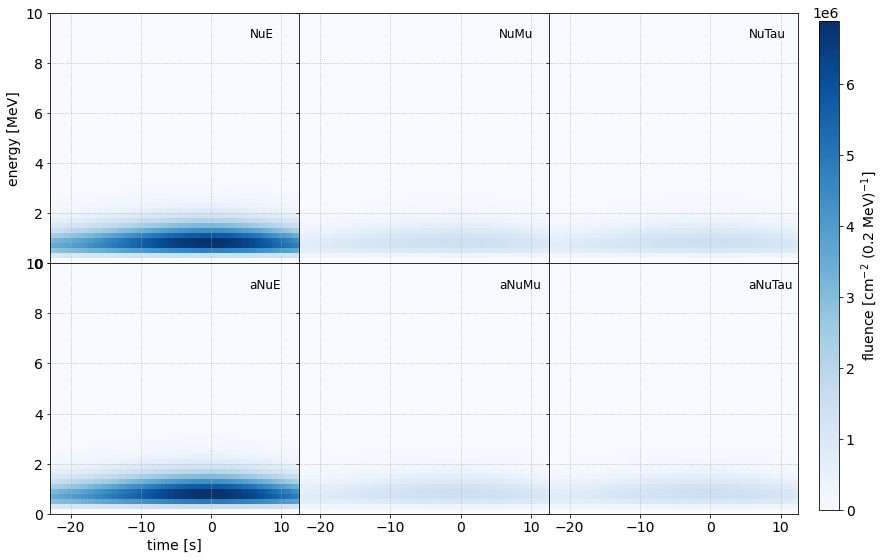

In [4]:
fig = plot_fluence(sn1)

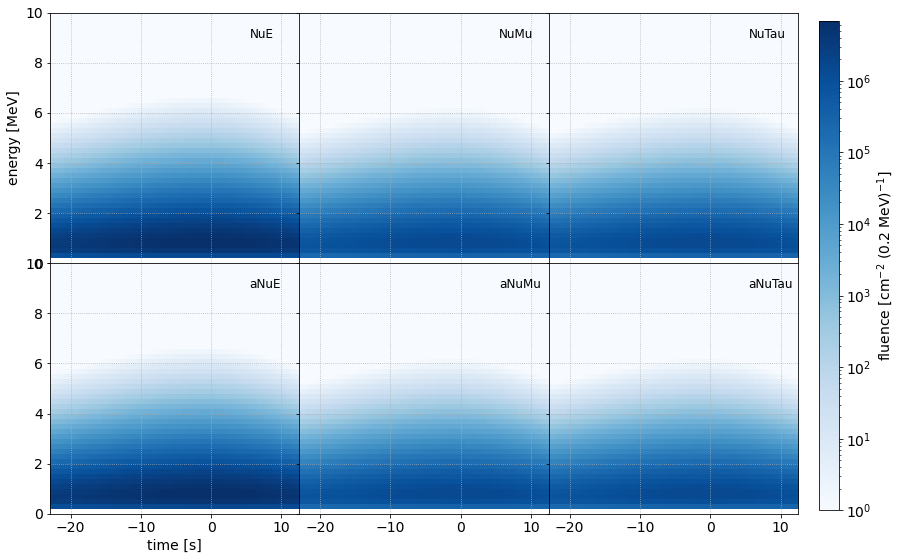

In [5]:
fig = plot_fluence(sn1, log=True)

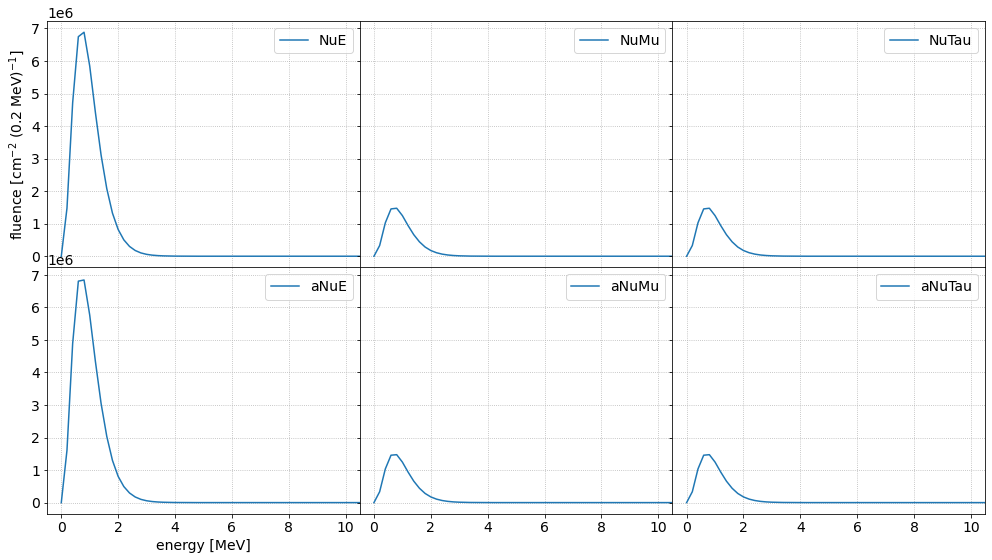

In [6]:
fig = plot_spectrum(sn1, time=0.)

### 150$M_\odot$ Progenitor, SFHo EOS

In [7]:
sn2 = SNOwGLoBES('../../models/PISN/PISN_150Msun_EOS=SFHo_NeutrinoFlux.tar.bz2')

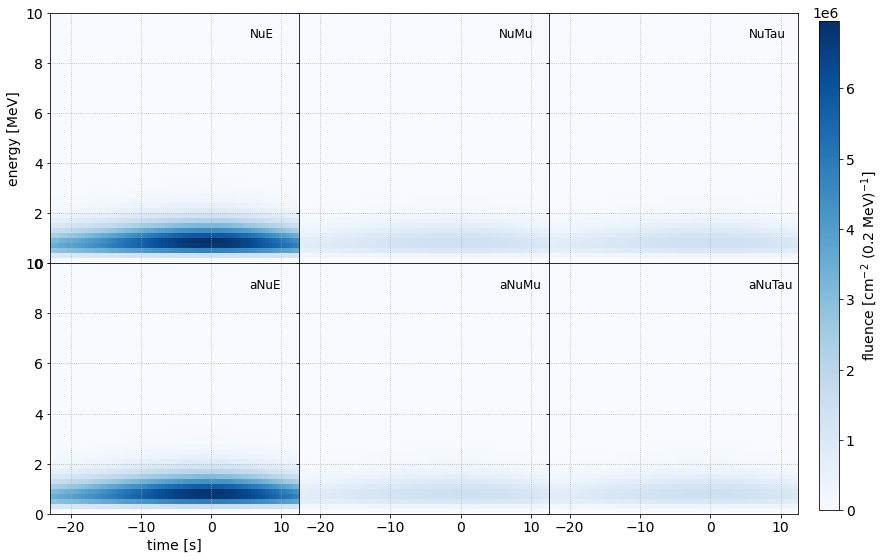

In [8]:
fig = plot_fluence(sn2)

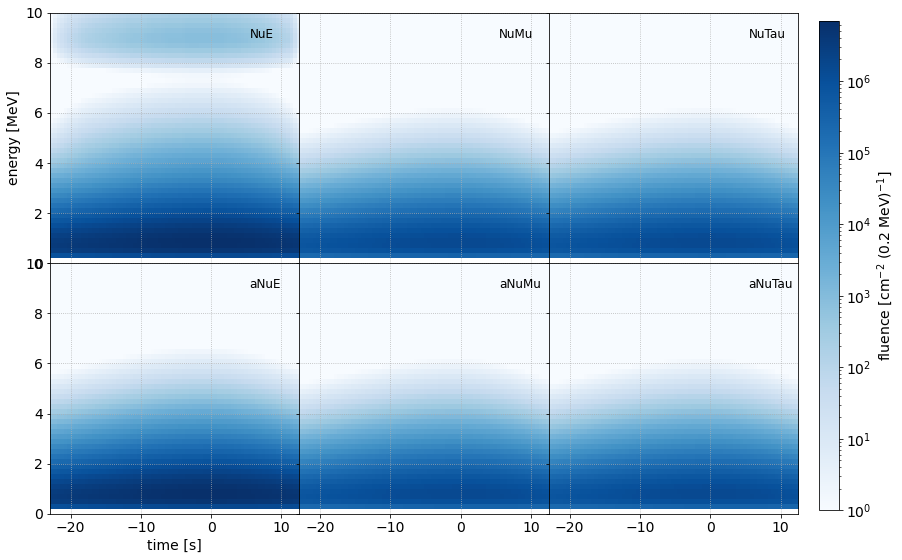

In [9]:
fig = plot_fluence(sn2, log=True)

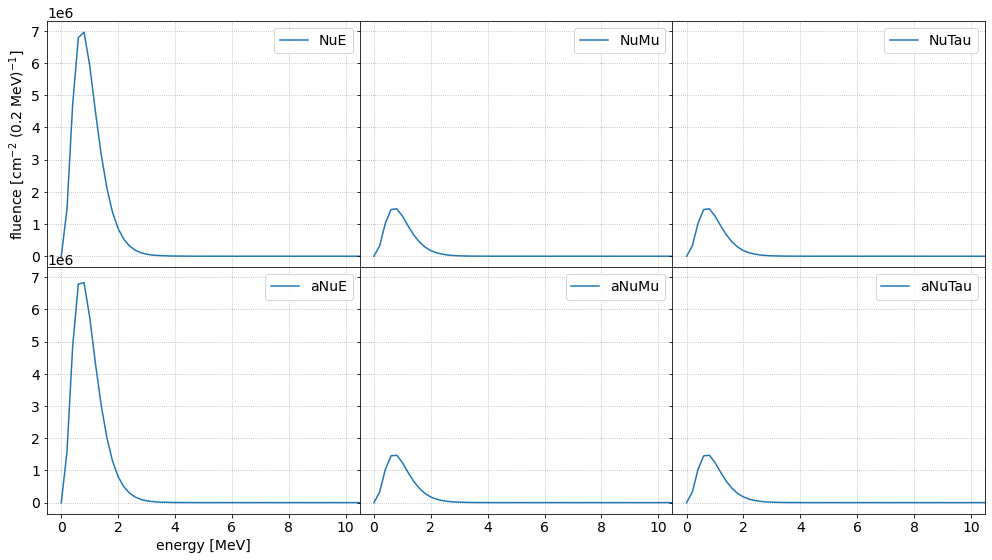

In [10]:
fig = plot_spectrum(sn2, time=0.)

### 250$M_\odot$ Progenitor, Helm EOS

In [11]:
sn3 = SNOwGLoBES('../../models/PISN/PISN_250Msun_EOS=Helm_NeutrinoFlux.tar.bz2')

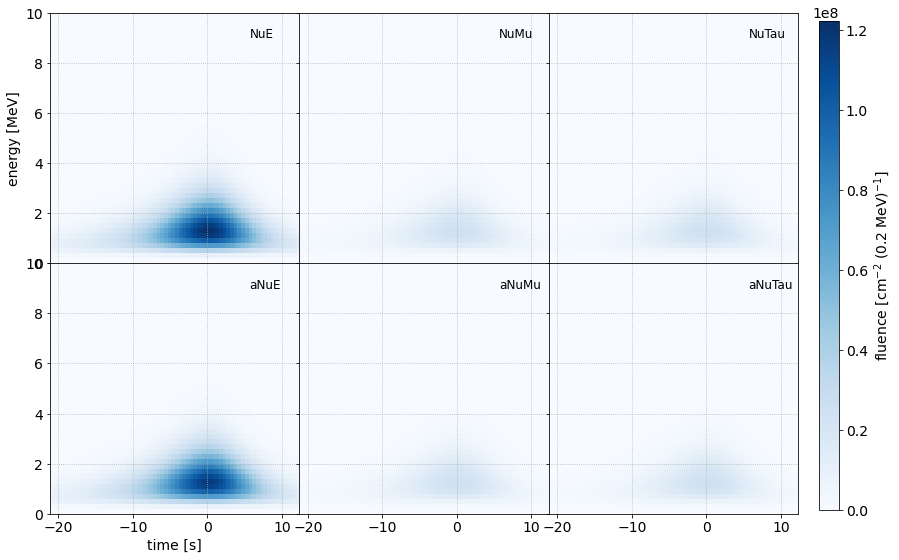

In [12]:
fig = plot_fluence(sn3)

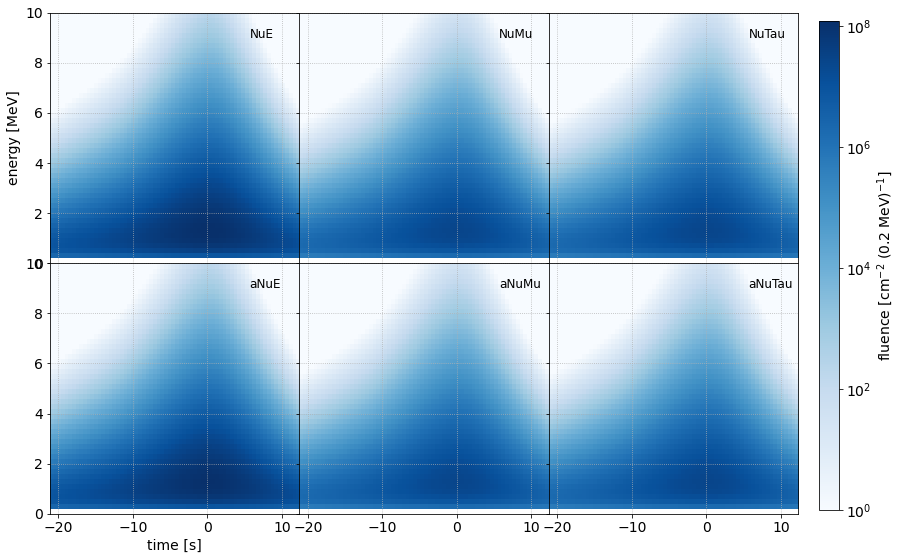

In [13]:
fig = plot_fluence(sn3, log=True)

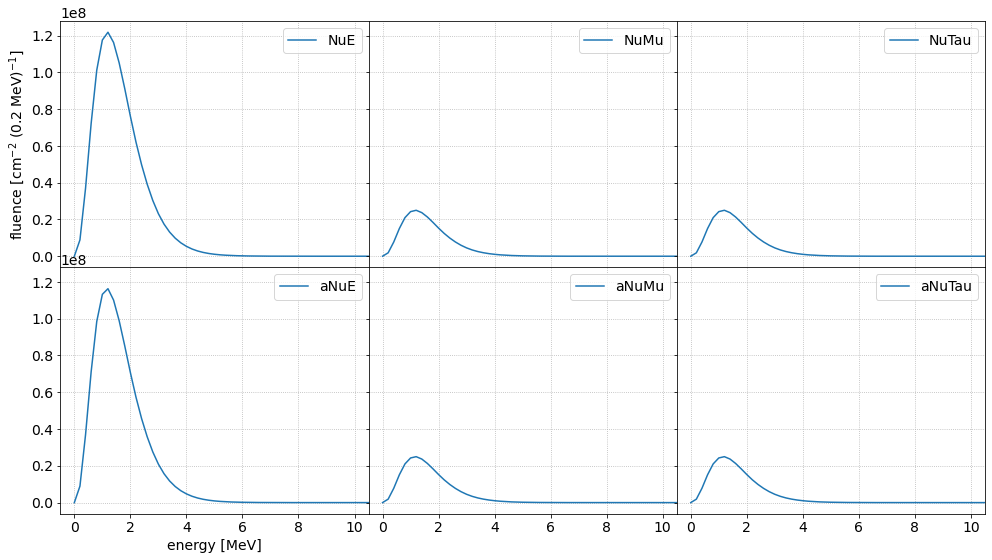

In [14]:
fig = plot_spectrum(sn3, time=0.)

### 250$M_\odot$ Progenitor, SFHo EOS

In [15]:
sn4 = SNOwGLoBES('../../models/PISN/PISN_250Msun_EOS=SFHo_NeutrinoFlux.tar.bz2')

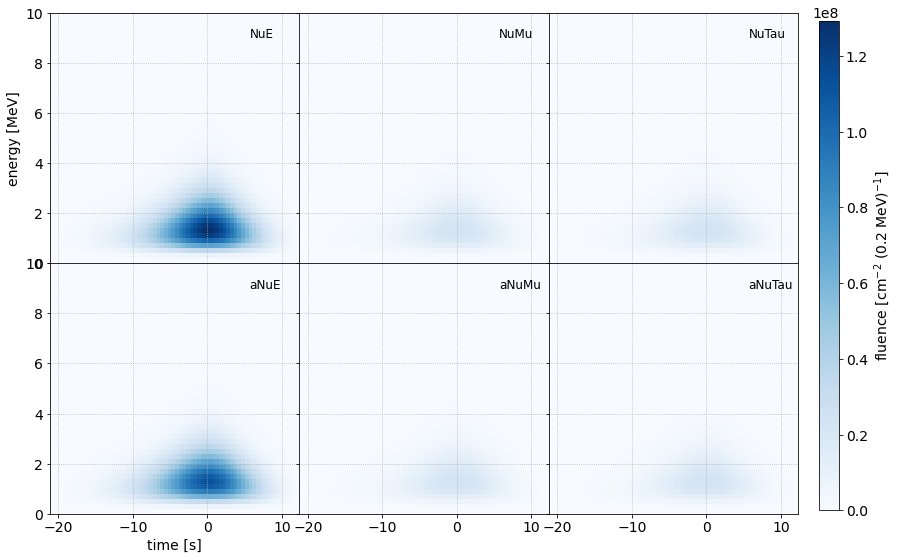

In [16]:
fig = plot_fluence(sn4)

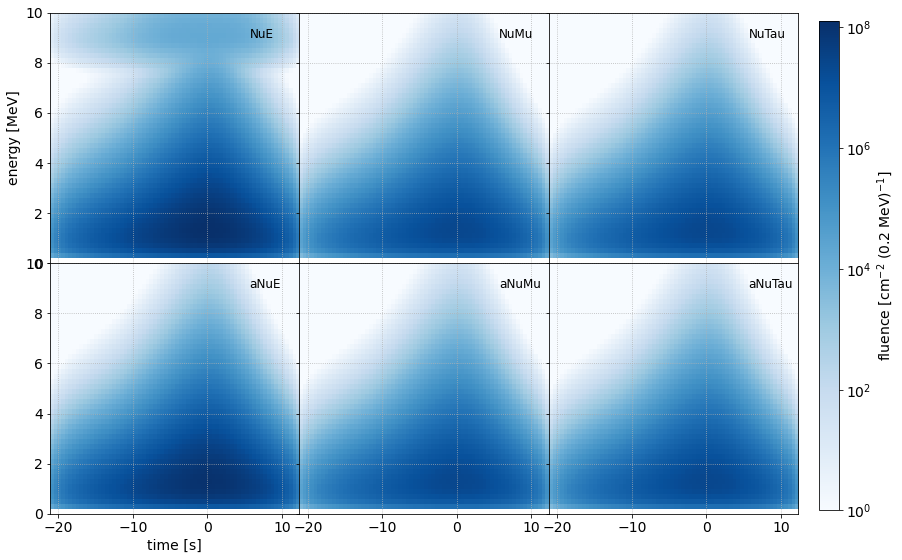

In [17]:
fig = plot_fluence(sn4, log=True)

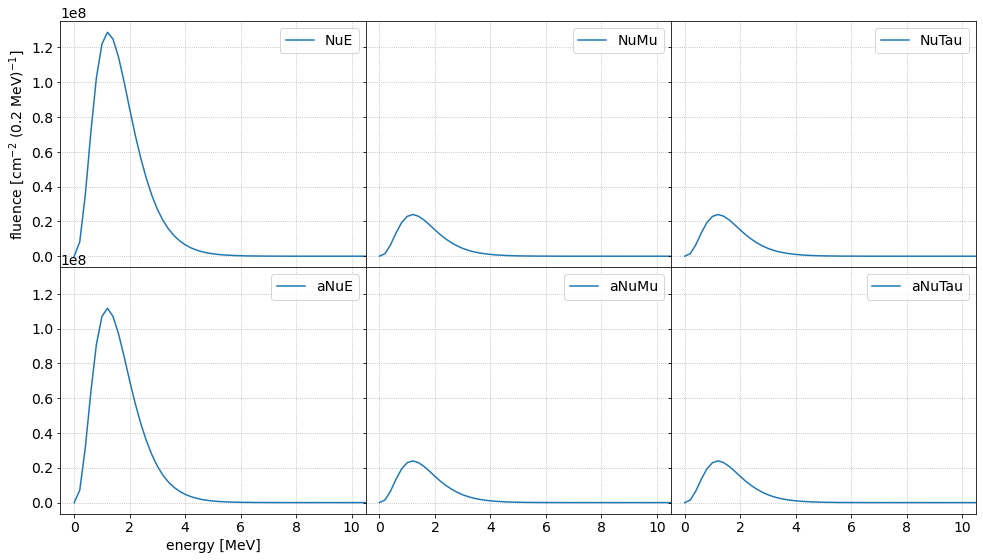

In [18]:
fig = plot_spectrum(sn4, time=0.)

## Type Ia Models

### GCD

In [19]:
sn5 = SNOwGLoBES('../../models/Type Ia/GCD_NeutrinoFlux.tar.bz2')

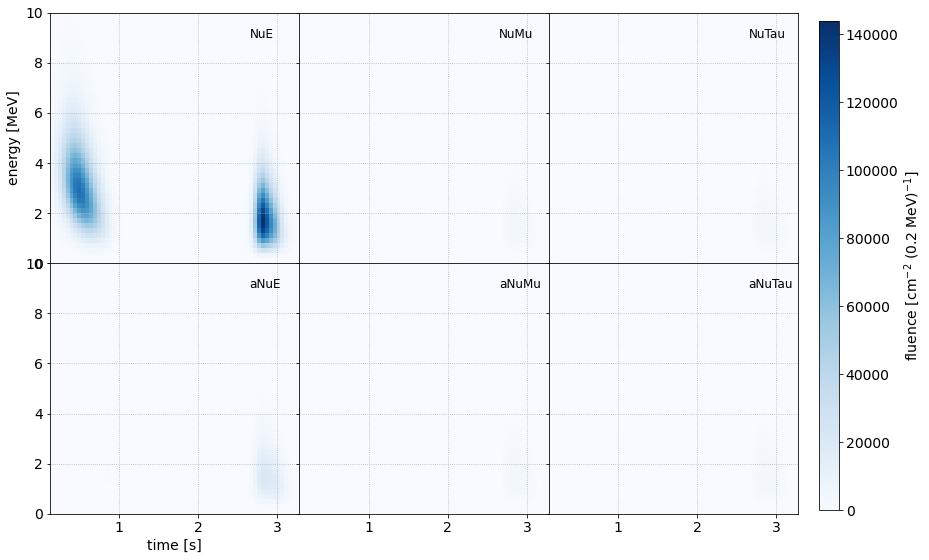

In [20]:
fig = plot_fluence(sn5)

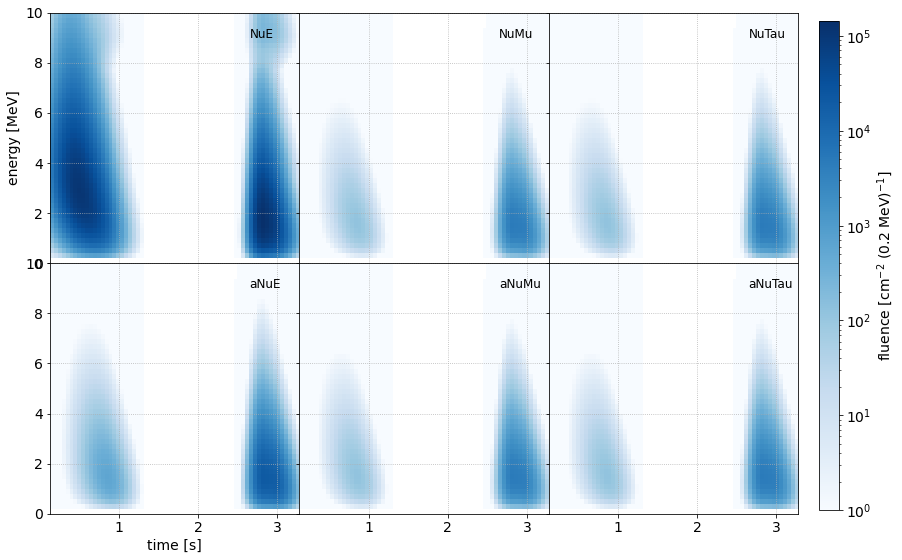

In [21]:
fig = plot_fluence(sn5, log=True)

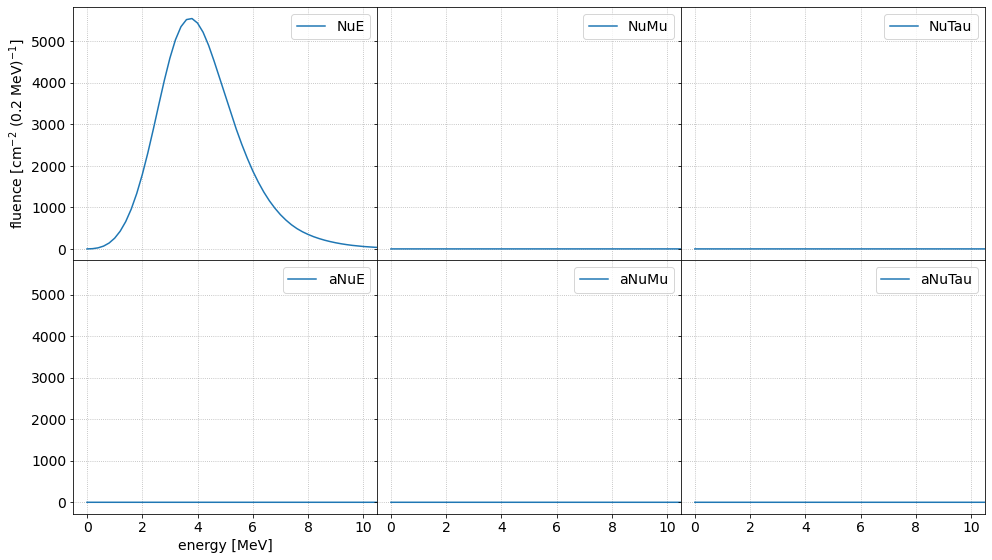

In [22]:
fig = plot_spectrum(sn5, time=0.5)

### DDT

In [23]:
sn6 = SNOwGLoBES('../../models/Type Ia/DDT_NeutrinoFlux.tar.bz2')

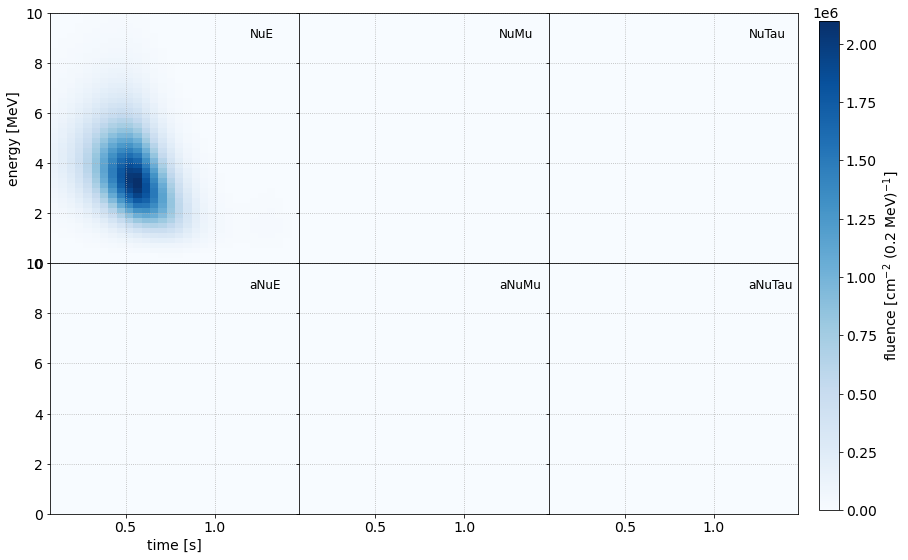

In [24]:
fig = plot_fluence(sn6)

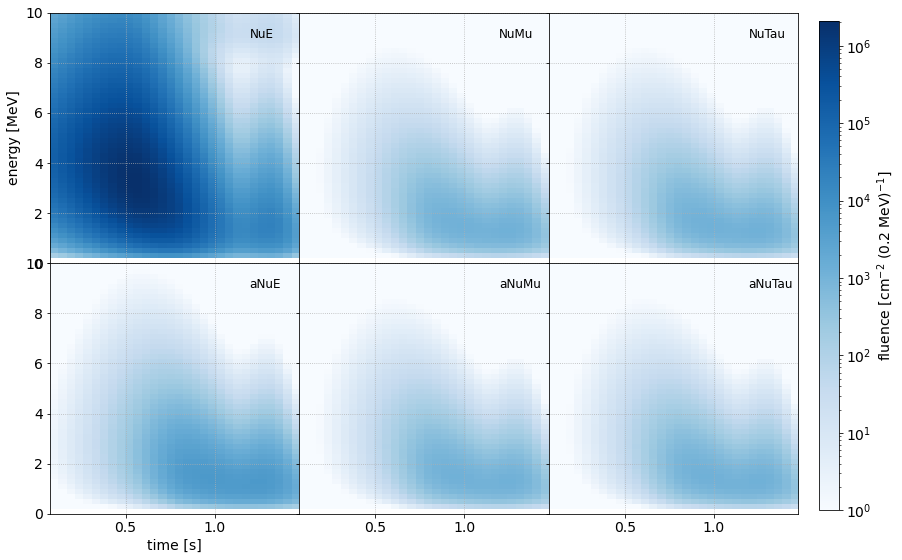

In [25]:
fig = plot_fluence(sn6, log=True)

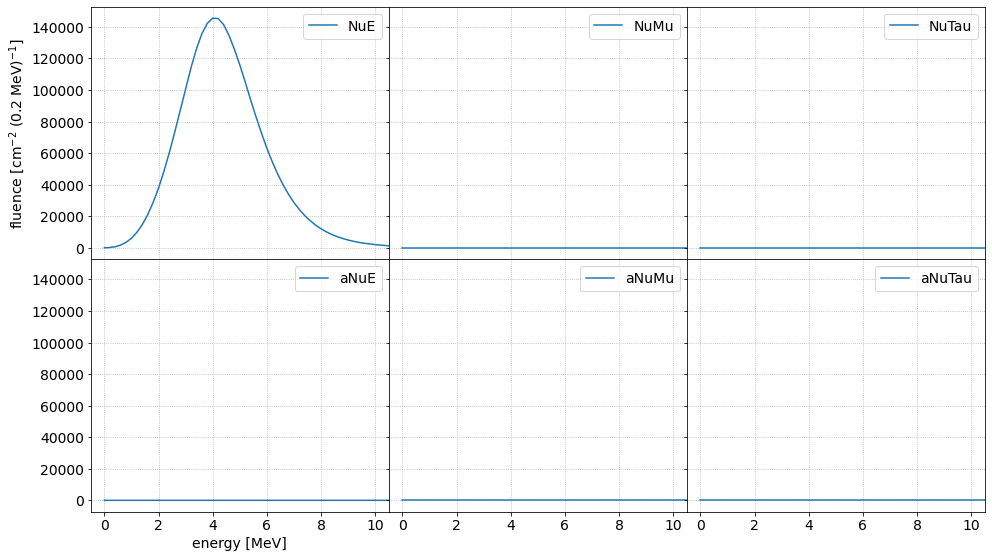

In [26]:
fig = plot_spectrum(sn6, time=0.5)

## Nakazato CCSN Model

Load the Nakazato CCSN model written to SNOwGLoBES format using the `to_snowglobes` converter in `snewpy`.

Note that the Nakazato SNOwGLoBES tarball is not uploaded to GitHub. If you want to repeat this, generate it yourself the converter.

In [27]:
sn7 = SNOwGLoBES('../../models/Nakazato_2013/nakazato-LS220-BH-z0.004-s30.0.SNOformat.tar.bz2')

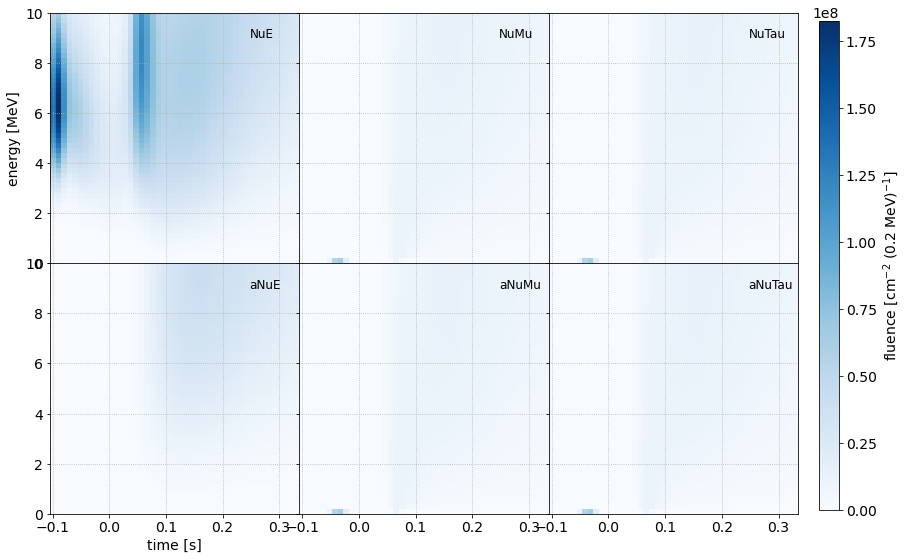

In [28]:
fig = plot_fluence(sn7)

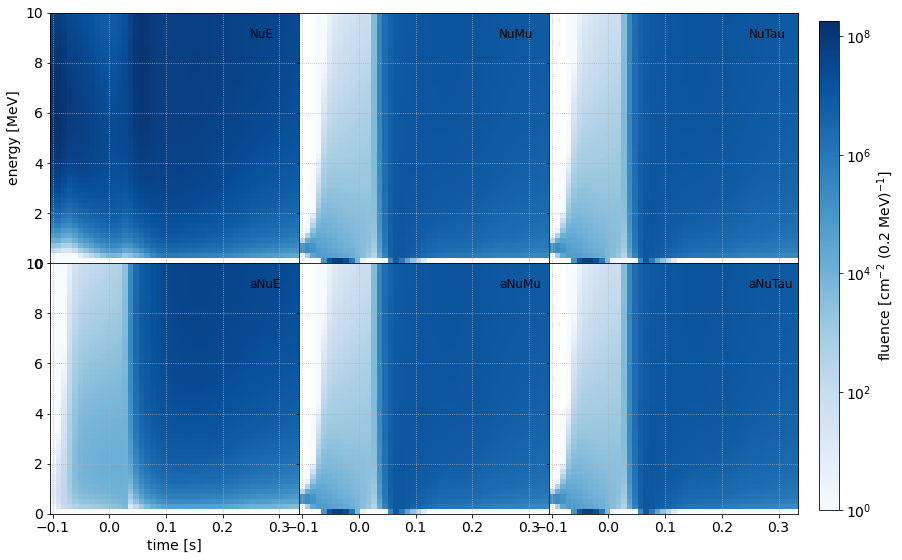

In [29]:
fig = plot_fluence(sn7, log=True)

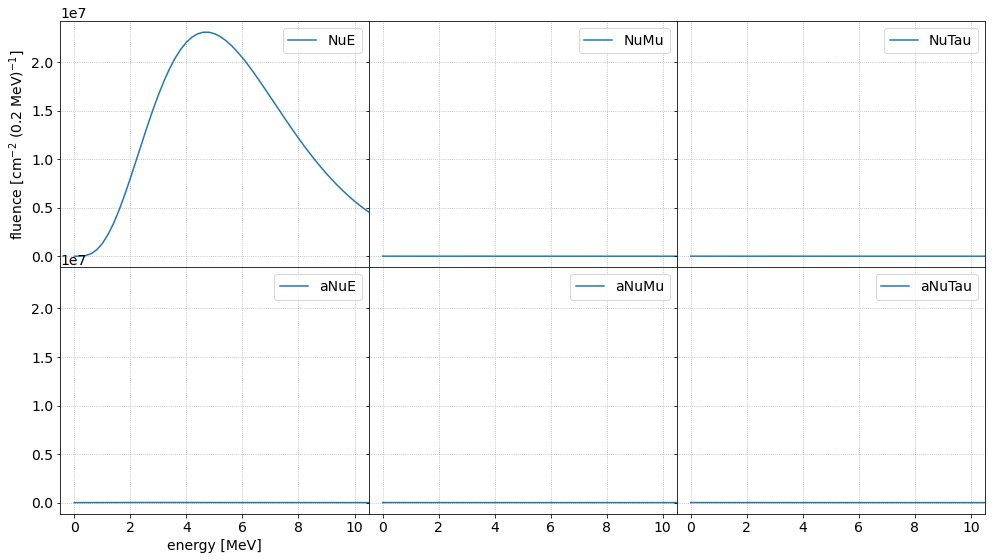

In [30]:
fig = plot_spectrum(sn7, time=0)